In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Copyright (C) 2019, Jianfeng Chen <jchen37@ncsu.edu>
# vim: set ts=4 sts=4 sw=4 expandtab smartindent:
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
#  of this software and associated documentation files (the "Software"), to deal
#  in the Software without restriction, including without limitation the rights
#  to use, copy, modify, merge, publish, _distribute, sublicense, and/or sell
#  copies of the Software, and to permit persons to whom the Software is
#  furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
#  all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
#  IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
#  FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
#  AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
#  LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
#  OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
#  THE SOFTWARE.

from __future__ import division
import sys
import os
path = os.getcwd()
rootpath = path[:path.rfind('FSSE') + 4]
sys.path.append(rootpath)

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
import pickle
from numpy import median
import scipy
import warnings
import numpy
import pdb

In [2]:
def boxploting(model, algs, metrics, ax):
    stats = list()
    for alg in algs:
        stats.append(
            pd.read_pickle(f'../results/{model}.{alg}.stats.pkl')[metrics].
            dropna())

    # http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    ax.boxplot(stats)
    ax.set_xticklabels(algs)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim(0, 1)
    ax.set_title(f'{metrics}@{model}')


/Users/jianfeng/.anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


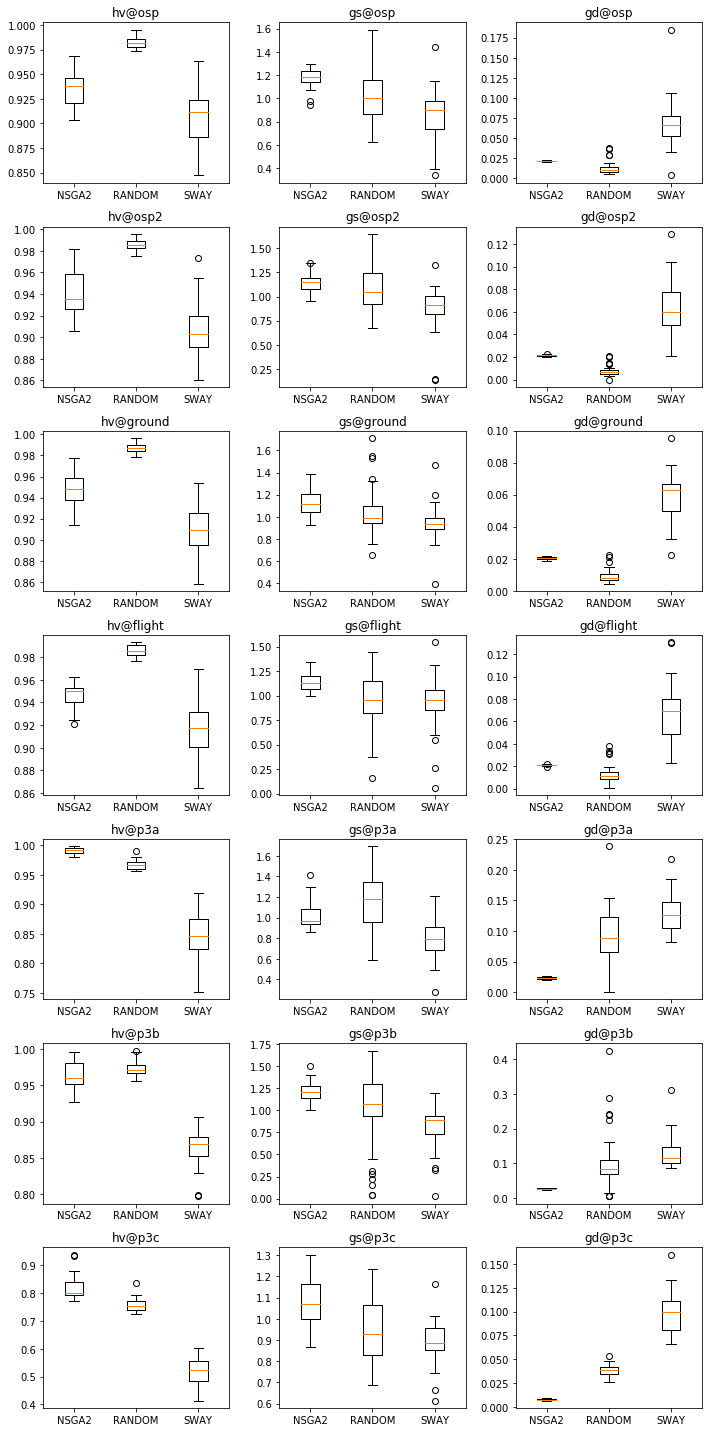

In [3]:
models = ['osp', 'osp2', 'ground', 'flight', 'p3a', 'p3b', 'p3c']
algs = ['NSGA2', 'RANDOM', 'SWAY']
metrics = ['hv', 'gs', 'gd']
model = models[0]
fig = plt.figure(1, figsize=(10, 20))

i = 1
for model in models:
    for metric in metrics:
        ax = fig.add_subplot(len(models), len(metrics), i)
        i += 1
        boxploting(model, algs, metric, ax)

plt.tight_layout()
# plt.show()
plt.savefig('../results/stat.pdf')
